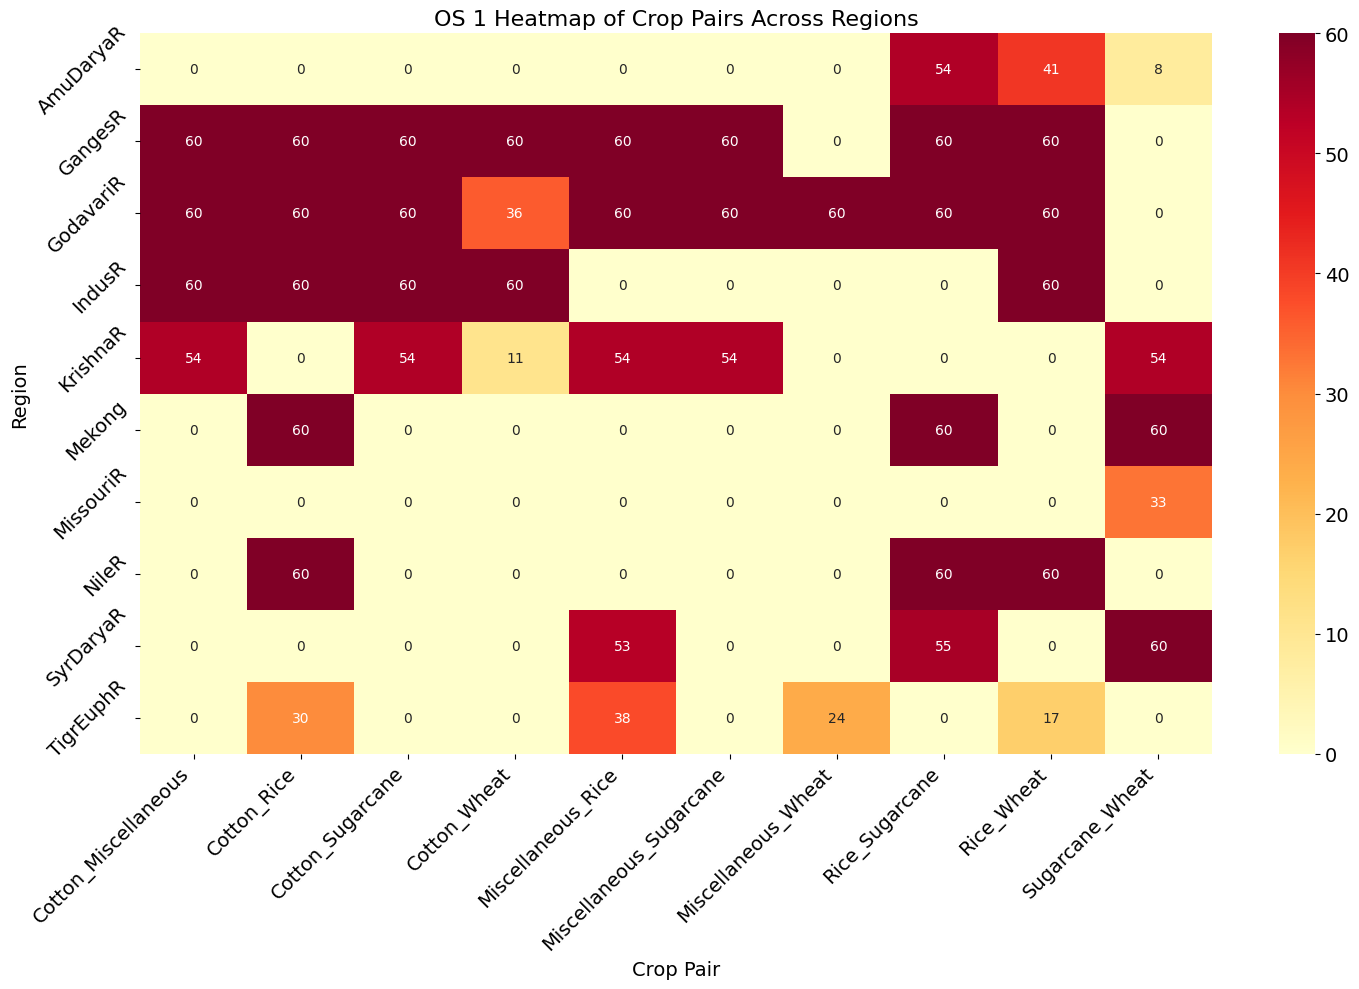

The highest count is 60 and it appears 28 times.
The total sum of counts across all cells is 2350.


In [15]:

import os
import pandas as pd


df=pd.read_csv('OS_1_BOI_scenarios/OS1_count_sum/consolidated_scenarios_OS1.csv')
# Ensure 'Count' is numeric
df['Count'] = pd.to_numeric(df['Count'])
df=df.dropna()
df

df['Input'] = df['Input'].str.replace('water_td_irr_', '')
df['Input'] = df['Input'].str.replace('_W', '')

df['Input'].unique()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 14,     # Axis label font size
    'xtick.labelsize': 14,    # X-axis tick label font size
    'ytick.labelsize': 14,    # Y-axis tick label font size
    'legend.fontsize': 14,    # Legend font size
    'figure.titlesize': 18    # Figure title font size
})

df['Combination'] = df['Combination'].replace({'FiberCrop': 'Cotton', 'SugarCrop': 'Sugarcane', 'MiscAll': 'Miscellaneous'}, regex=True)


# Extract crop names from combinations
df['Crop1'] = df['Combination'].apply(lambda x: x.split(' vs ')[0].split('_')[0])
df['Crop2'] = df['Combination'].apply(lambda x: x.split(' vs ')[1].split('_')[0])

# Create a new column with sorted crop pairs
df['CropPair'] = df.apply(lambda row: '_'.join(sorted([row['Crop1'], row['Crop2']])), axis=1)

# Create a pivot table with the new CropPair column
pivot_data_crops = df.pivot_table(values='Count', index='Input', columns='CropPair', aggfunc='sum', fill_value=0)

# Find the highest count and how many times it appears
highest_count = pivot_data_crops.max().max()
highest_count_appearances = (pivot_data_crops == highest_count).sum().sum()

# Sum the total counts of each cell
total_counts = pivot_data_crops.values.sum()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data_crops, annot=True, fmt='d', cmap='YlOrRd')
plt.title('OS 1 Heatmap of Crop Pairs Across Regions')
plt.xlabel('Crop Pair')
plt.ylabel('Region')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('OS1_60_scenarios_heatmap_croppairs_regions.png', dpi=600, bbox_inches='tight')
plt.show()

# Display the highest count and total counts
print(f"The highest count is {highest_count} and it appears {highest_count_appearances} times.")
print(f"The total sum of counts across all cells is {total_counts}.")






In [5]:
df=pd.read_pickle('df_OS1.pkl')
# List of columns to check for value frequencies
columns = ['gw', 'res', 'esm', 'tax', 'ssp', 'ag', 'soc']

# Print frequency of each unique value for each specified column
for column in columns:
    value_counts = df[column].value_counts()
    print(f"Frequencies in '{column}':\n{value_counts}\n")

Frequencies in 'gw':
gw
3    20
1    20
2    20
Name: count, dtype: int64

Frequencies in 'res':
res
2    30
1    30
Name: count, dtype: int64

Frequencies in 'esm':
esm
1    12
2    12
3    12
4    12
5    12
Name: count, dtype: int64

Frequencies in 'tax':
tax
2    60
Name: count, dtype: int64

Frequencies in 'ssp':
ssp
1    60
Name: count, dtype: int64

Frequencies in 'ag':
ag
1    30
5    30
Name: count, dtype: int64

Frequencies in 'soc':
soc
3    60
Name: count, dtype: int64



In [14]:
import pandas as pd

# Load the DataFrame from a pickle file
df = pd.read_pickle('df_OS5.pkl')

# List of columns to check for value frequencies
columns = ['gw', 'res', 'esm', 'tax', 'ssp', 'ag', 'soc']

# Create a dictionary to hold data before converting it to DataFrame
data = {'Column': [], 'Value': [], 'Frequency': []}

# Compute frequency of each unique value for each specified column
for column in columns:
    value_counts = df[column].value_counts()
    for value, count in value_counts.items():
        data['Column'].append(column)
        data['Value'].append(value)
        data['Frequency'].append(count)

# Convert dictionary to DataFrame for better visualization
frequency_table = pd.DataFrame(data)

# Display the DataFrame containing all frequency data
frequency_table


,Column,Value,Frequency
0,gw,3,20
1,gw,1,20
2,gw,2,20
3,res,2,30
4,res,1,30
5,esm,1,12
6,esm,2,12
7,esm,3,12
8,esm,4,12
9,esm,5,12


In [6]:
columns = ['gw', 'res', 'esm', 'tax', 'ssp', 'ag', 'soc']

# Print unique values and their counts for each specified column
for column in columns:
    unique_values = df[column].unique()
    count = len(unique_values)
    print(f"Unique values in '{column}': {unique_values}")


# Print frequency of each unique value for each specified column
for column in columns:
    value_counts = df[column].value_counts()
    print(f"Frequencies in '{column}':\n{value_counts}\n")

Unique values in 'gw': [3 1 2]
Unique values in 'res': [2 1]
Unique values in 'esm': [1 2 3 4 5]
Unique values in 'tax': [2]
Unique values in 'ssp': [1]
Unique values in 'ag': [1 5]
Unique values in 'soc': [3]
Frequencies in 'gw':
gw
3    20
1    20
2    20
Name: count, dtype: int64

Frequencies in 'res':
res
2    30
1    30
Name: count, dtype: int64

Frequencies in 'esm':
esm
1    12
2    12
3    12
4    12
5    12
Name: count, dtype: int64

Frequencies in 'tax':
tax
2    60
Name: count, dtype: int64

Frequencies in 'ssp':
ssp
1    60
Name: count, dtype: int64

Frequencies in 'ag':
ag
1    30
5    30
Name: count, dtype: int64

Frequencies in 'soc':
soc
3    60
Name: count, dtype: int64



In [7]:
columns = ['gw', 'res', 'esm', 'tax', 'ssp', 'ag', 'soc']

# Print frequency of each unique value for each specified column
for column in columns:
    if column in df.columns:  # Check if the column exists in the DataFrame
        value_counts = df[column].value_counts()
        print(f"Frequencies in '{column}':\n{value_counts}\n")
    else:
        print(f"Column '{column}' not found in the DataFrame.")

Frequencies in 'gw':
gw
3    20
1    20
2    20
Name: count, dtype: int64

Frequencies in 'res':
res
2    30
1    30
Name: count, dtype: int64

Frequencies in 'esm':
esm
1    12
2    12
3    12
4    12
5    12
Name: count, dtype: int64

Frequencies in 'tax':
tax
2    60
Name: count, dtype: int64

Frequencies in 'ssp':
ssp
1    60
Name: count, dtype: int64

Frequencies in 'ag':
ag
1    30
5    30
Name: count, dtype: int64

Frequencies in 'soc':
soc
3    60
Name: count, dtype: int64

